# Radar Data Streaming and Pre-Processing

### This notebook demonstrates how to read the data from the radar using python wrapper for Infineon Radar SDK

#### Importing required libraries 

    - ifxdaq --> is the python wrapper for Radar SDK
    - processing --> is python module for basic processing to get the range-Dopplers from the signal
    - fft --> contains the range_fft and doppler_fft methods
    

In [1]:
import ifxdaq
import processing
import numpy as np
#print(ifxdaq.__version__)
from ifxdaq.sensor.radar_ifx import RadarIfxAvian
import matplotlib.pyplot as plot
import cv2

#### In the folder 'radar_configs' you find radar configuration parameters. It contains radar parameters :

    - transmit power level
    - start/end frequency
    - sampling rate
    - # of chirps per frame
    - # of samples per chirp
    - # of transmit/receive antennas
    - MIMO mode selection

In [2]:
# import logging
# logging.basicConfig(level=logging.DEBUG)

In [3]:
config_file = "radar_configs/RadarIfxBGT60.json"
number_of_frames = 10

In [4]:
## Run this to understand the current radar settings better
import json
with open(config_file) as json_file:
    c = json.load(json_file)["device_config"]["fmcw_single_shape"]
    chirp_duration = c["num_samples_per_chirp"]/c['sample_rate_Hz']
    frame_duration = (chirp_duration + c['chirp_repetition_time_s']) * c['num_chirps_per_frame']
    print("With the current configuration, the radar will send out " + str(c['num_chirps_per_frame']) + \
          ' signals with varying frequency ("chirps") between ' + str(c['start_frequency_Hz']/1e9) + " GHz and " + \
          str(c['end_frequency_Hz']/1e9) + " GHz.")
    print('Each chirp will consist of ' + str(c["num_samples_per_chirp"]) + ' ADC measurements of the IF signal ("samples").')
    print('A chirp takes ' + str(chirp_duration*1e6) + ' microseconds and the delay between the chirps is ' + str(c['chirp_repetition_time_s']*1e6) +' microseconds.')
    print('With a total frame duration of ' + str(frame_duration*1e3) + ' milliseconds and a delay of ' + str(c['frame_repetition_time_s']*1e3) + ' milliseconds between the frame we get a frame rate of ' + str(1/(frame_duration + c['frame_repetition_time_s'])) + ' radar frames per second.')

With the current configuration, the radar will send out 64 signals with varying frequency ("chirps") between 60.5 GHz and 61.5 GHz.
Each chirp will consist of 128 ADC measurements of the IF signal ("samples").
A chirp takes 64.0 microseconds and the delay between the chirps is 400.0 microseconds.
With a total frame duration of 29.696 milliseconds and a delay of 50.0 milliseconds between the frame we get a frame rate of 12.547681188516362 radar frames per second.


#### the next code block initiliaze the radar with set configuration and loop through the continuous frames; when it  reaches desired number of frames, we process it to get the range-doppler information out of it.

In [9]:
raw_data    = []

import time 
start = time.time()

with RadarIfxAvian(config_file) as device:                             # Initialize the radar with configurations
    
    for i_frame, frame in enumerate(device):                           # Loop through the frames coming from the radar
        f = np.squeeze(frame['radar'].data/(4095.0))      # Dividing by 4095.0 to scale the data
        # raw_data.append(f)

        data = np.asarray([f])
        range_doppler_map = processing.processing_rangeDopplerData(data)



        # abs = np.abs(range_doppler_map)
        # joined = np.concatenate((abs[0,0,:,:],abs[0,1,:,:],abs[0,2,:,:] ))
        # cv2.imshow('frame', joined)


        # press 'Q' if you want to exit
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break



0.06897937020179501
0.13691958589492761
0.19913460085161905
0.2576749282616895
0.31278727556340025
0.36112599083943736
0.4134981631525525
0.4598877827821233
0.503398245791353
0.5369714509462619
0.576844829737169
0.6147796091948488
0.6462435156919857
0.6801403770873145
0.7176816471387085
0.7388480241795404
0.7687451032067433
0.7973776905682844
0.8249139289148222
0.8457382341214021
0.8764797168820261
0.8855956894998461
0.9191586022155318
0.9359596882162284
0.9574275621795585
0.9790347982103845
0.9995774748992212
1.0136308001854943
1.0326266214775015
1.05132955340642
1.063938006597514
1.0812526568827492
1.097877546531128
1.114526552234729
1.12996958606147
1.1396805817233604
1.1545964014662748
1.164011841553728
1.1780799200355598
1.192041738626253
1.2006731618008704
1.2053150260138552
1.2264147956734484
1.2387782178193292
1.2456648096480227
1.2574678211934336
1.2690794278741522
1.2750977422189618
1.285898345379489
1.2969923680818687
1.3072981070323408
1.3172565214710534
1.3223900318538808


#### Note: There is a function to get range_data called "processing_rangeData" which will be usefull to detect the movements.

In [ ]:
# The shape of the radar data depends on the radar settings.
# The different dimensions of the shape are (frame_index, receiver_index, chirp_index, sample_index).

print("(frame_index, receiver_index, chirp_index, sample_index)")
print(data.shape)

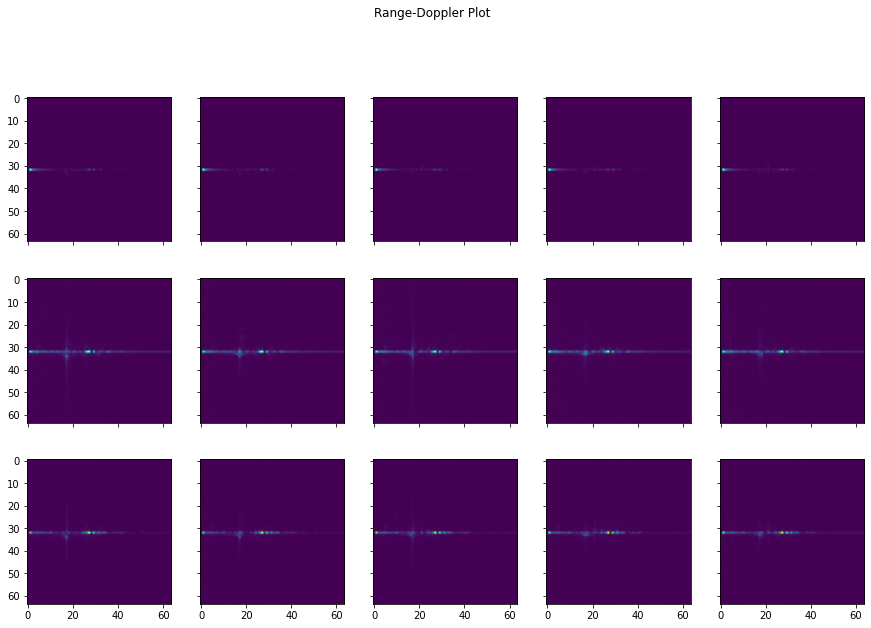

In [7]:
fig, axs = plot.subplots(3, 5, figsize=(15,10),sharex=True, sharey=  True)
fig.suptitle('Range-Doppler Plot')

for i in range(3):
    for j in range(5):
        axs[i, j].imshow(np.abs(range_doppler_map)[j,i,:,:])
        axs[i, j].set_aspect('equal')

plot.subplots_adjust(hspace=0)

In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = "cuda" if torch.cuda.is_available() else "cpu"
# devica = "cpu"

In [6]:
import numpy as np
import matplotlib.pyplot as plot
import json
import processing

recording = "recording_2022_05_25_11_46_26"
data = np.load(f"../../recordings/{recording}/RadarIfxAvian_00/radar.npy")
number_of_frames = data.size
with open(f'../../recordings/{recording}/desc.txt', 'r') as f:
    print("Scene description: " + f.read())

config_file = "../../examples/radar_configs/RadarIfxBGT60.json"
with open(config_file) as json_file:
    c = json.load(json_file)["device_config"]["fmcw_single_shape"]
    chirp_duration = c["num_samples_per_chirp"] / c['sample_rate_Hz']
    frame_duration = (chirp_duration + c['chirp_repetition_time_s']) * c['num_chirps_per_frame']

# Cut the clip to something interesting happening
start_frame, end_frame = 300, 400
data = data[start_frame:end_frame]

print(f"Number of frames: {data.shape[0]}\nClip length: {data.shape[0] * c['frame_repetition_time_s']} seconds")
print(f"Timestamps: {start_frame * c['frame_repetition_time_s']} - {end_frame* c['frame_repetition_time_s']}")

range_doppler_map = processing.processing_rangeDopplerData(data)


Scene description: 1 person, comes into frame around 0:12, moves around a bit, goes out of frame at 0:28
[[[[1918 1858 1851 ... 1988 2022 2020]
   [1916 1852 1847 ... 1982 2018 2016]
   [1913 1850 1850 ... 1980 2018 2020]
   ...
   [1917 1844 1820 ... 1986 2032 2034]
   [1910 1840 1824 ... 1990 2034 2032]
   [1919 1846 1830 ... 1994 2034 2030]]

  [[2024 1976 1952 ... 1929 1905 1916]
   [2020 1976 1955 ... 1928 1902 1913]
   [2022 1978 1958 ... 1929 1904 1914]
   ...
   [2012 1960 1934 ... 1934 1914 1928]
   [2008 1956 1930 ... 1930 1918 1927]
   [2010 1954 1932 ... 1934 1916 1928]]

  [[2020 1998 1984 ... 1934 1926 1958]
   [2028 2006 1990 ... 1930 1922 1950]
   [2017 2000 1984 ... 1930 1924 1952]
   ...
   [2000 1975 1967 ... 1934 1932 1960]
   [1998 1974 1967 ... 1936 1934 1960]
   [1998 1976 1970 ... 1936 1931 1958]]]


 [[[1916 1844 1830 ... 1980 2024 2026]
   [1916 1842 1826 ... 1974 2017 2022]
   [1918 1838 1824 ... 1977 2024 2026]
   ...
   [1924 1842 1812 ... 1982 2028 2032]
 

In [65]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.main = nn.Sequential(

            nn.Conv2d(3, 10, 4, stride=2, padding=1, bias=False), 
            nn.MaxPool2d(10, 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(10, 10 * 2, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(10 * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(10 * 2, 10 * 4, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(10 * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(840, 400, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(400, 200, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(200, 50, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(50, 4, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

net = Net().to(device)

from torchsummary import summary

summary(net, (3,128,64))


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 4]                   --
|    └─Conv2d: 2-1                       [-1, 10, 64, 32]          480
|    └─MaxPool2d: 2-2                    [-1, 10, 28, 12]          --
|    └─LeakyReLU: 2-3                    [-1, 10, 28, 12]          --
|    └─Conv2d: 2-4                       [-1, 20, 14, 6]           3,200
|    └─BatchNorm2d: 2-5                  [-1, 20, 14, 6]           40
|    └─LeakyReLU: 2-6                    [-1, 20, 14, 6]           --
|    └─Conv2d: 2-7                       [-1, 40, 7, 3]            12,800
|    └─BatchNorm2d: 2-8                  [-1, 40, 7, 3]            80
|    └─LeakyReLU: 2-9                    [-1, 40, 7, 3]            --
|    └─Flatten: 2-10                     [-1, 840]                 --
|    └─Linear: 2-11                      [-1, 400]                 336,000
|    └─LeakyReLU: 2-12                   [-1, 400]                 --
| 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 4]                   --
|    └─Conv2d: 2-1                       [-1, 10, 64, 32]          480
|    └─MaxPool2d: 2-2                    [-1, 10, 28, 12]          --
|    └─LeakyReLU: 2-3                    [-1, 10, 28, 12]          --
|    └─Conv2d: 2-4                       [-1, 20, 14, 6]           3,200
|    └─BatchNorm2d: 2-5                  [-1, 20, 14, 6]           40
|    └─LeakyReLU: 2-6                    [-1, 20, 14, 6]           --
|    └─Conv2d: 2-7                       [-1, 40, 7, 3]            12,800
|    └─BatchNorm2d: 2-8                  [-1, 40, 7, 3]            80
|    └─LeakyReLU: 2-9                    [-1, 40, 7, 3]            --
|    └─Flatten: 2-10                     [-1, 840]                 --
|    └─Linear: 2-11                      [-1, 400]                 336,000
|    └─LeakyReLU: 2-12                   [-1, 400]                 --
| 

In [87]:
input = torch.randn(1, 3, 128, 64).to(device)
out = net(input)
print(out)


tensor([[0.4991, 0.4931, 0.4824, 0.4959]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)


In [90]:
net.zero_grad()
out.backward(torch.randn(1, 4).to(device))



RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [102]:
from torch.utils.data import Dataset
import numpy as np
import processing
from torch.utils.data import DataLoader, random_split


class SensorDataset(Dataset):
    def __init__(self):
        self.samples = []

        recording_list = [
            {'title': 'recording_2022_05_25_11_55_19', 'start': 300, 'end': 400, 'label': 0},  # 0 people
            {'title': 'recording_2022_05_25_11_46_26', 'start': 300, 'end': 400, 'label': 1},  # 1 person
            {'title': 'recording_2022_05_25_11_47_20', 'start': 300, 'end': 400, 'label': 2},  # 2 people
            {'title': 'recording_2022_05_25_11_48_56', 'start': 300, 'end': 400, 'label': 3},  # 3 people
        ]

        for recording in recording_list:
            file_name = f'../../recordings/{recording["title"]}/RadarIfxAvian_00/radar.npy'
            data = np.load(file_name)
            start_frame, end_frame, label = recording["start"], recording["end"], recording["label"]

            # iterate frames
            processed_data = processing.processing_rangeDopplerData(data[start_frame:end_frame])
            processed_data = np.abs(processed_data)
            for f in processed_data:
                self.samples.append((f, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]


dataset = SensorDataset()
print(len(dataset))
print(dataset[120])
train_size, test_size = round(len(dataset) * 0.8), round(len(dataset) * 0.2)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


400
(array([[[  0.        , 180.14322919, 414.26175531, ...,  71.40206434,
          80.81485765, 123.06359895],
        [  0.        , 274.92280076, 235.08042928, ...,  48.61058961,
          50.91901018,  34.86425288],
        [  0.        ,  37.32593779, 377.24152753, ..., 105.31151306,
          53.35162562,  34.58918964],
        ...,
        [  0.        ,  61.45960145, 228.19512446, ...,  59.33214726,
          43.12821465, 103.70522056],
        [  0.        , 138.3771356 , 337.33718953, ..., 134.94625284,
          91.94628944,  62.52485891],
        [  0.        , 390.38915245, 295.01424377, ...,  26.47776821,
          94.82267482,  55.38843505]],

       [[  0.        , 784.14347068, 205.3188624 , ...,  61.91715975,
          68.59683895,  84.65631788],
        [  0.        ,  92.91415885, 205.98820719, ...,  67.72016161,
          56.13727272, 103.2191769 ],
        [  0.        , 342.90855188, 611.73461534, ..., 110.20194721,
         116.65829515,  84.3881543 ],
        

In [104]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [108]:
for sample, label in train_loader:
    sample.to(device)
    print(net(sample))
    print(label)
    break

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper___slow_conv2d_forward)